In [1]:
%matplotlib inline

# RSSI vs. Distance KDE Plot

The code below (taken from pi_pact_plot_distance.py) uses a kernel-density estimator to plot the probability-density functions of RSSI for each meter-long distance range.

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pathlib import Path
from pi_pact_sort import categorize

DROP_COLUMNS = ['ADDRESS', 'TIMESTAMP', 'UUID', 'MAJOR', 'MINOR', 'TX POWER', 'TEMPERATURE',
                'HUMIDITY', 'PRESSURE', 'PITCH', 'ROLL', 'YAW', 'SCAN']
SAMPLE_SIZE: int = 30000

In [3]:
# Initialize DataFrame
data: pd.DataFrame = pd.DataFrame(columns=['RSSI', 'DISTANCE'])
data_copy: pd.DataFrame = data.copy()
csv_file: Path
for csv_file in Path('.').glob('indoor*/*.csv'):
    datapart: pd.DataFrame = pd.read_csv(csv_file)
    for column in DROP_COLUMNS:
        if column in datapart.columns:
            datapart = datapart.drop([column], 1)
    data_copy = data_copy.append(datapart)

In [4]:
# Categorize distance
data_copy['DISTANCE'] = data_copy['DISTANCE'].map(categorize)

In [5]:
# Sample data from each distance category
for value in data_copy['DISTANCE'].unique():
    datapart = data_copy[data_copy.DISTANCE == value]
    datapart = datapart.sample(SAMPLE_SIZE)
    data = data.append(datapart)
data_dict = {'H2': data[data.DISTANCE == 2]['RSSI'].to_numpy(dtype=int),
             'H1': data[data.DISTANCE == 1]['RSSI'].to_numpy(dtype=int),
             'H0': data[data.DISTANCE == 0]['RSSI'].to_numpy(dtype=int)}
data = pd.DataFrame.from_dict(data_dict)

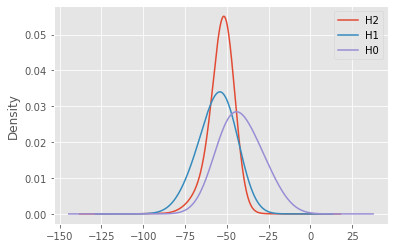

In [6]:
# Plot a histogram of RSSI vs. Distance
style.use("ggplot")
data.plot.kde(bw_method=1, legend=True, backend='matplotlib')
plt.show()

# Mode RSSI vs. Distance

The code below (taken directly from pi_pact_mode_rssi.py) plots the Mode RSSI vs. Distance relationship. There is an overall downward trend, but nothing strong enough for us to create a model predicting distance with RSSI values alone.

In [7]:
DROP_COLUMNS = ['ADDRESS', 'TIMESTAMP', 'UUID', 'MAJOR', 'MINOR', 'TX POWER', 'PITCH', 'ROLL', 'YAW', 'SCAN']

In [8]:
# Initialize DataFrame
data: pd.DataFrame = pd.DataFrame(columns=['RSSI', 'DISTANCE', 'TEMPERATURE', 'HUMIDITY', 'PRESSURE'])
csv_file: Path
for csv_file in Path('.').glob('indoor-noObstruct-SenseHat*/*.csv'):
    datapart: pd.DataFrame = pd.read_csv(csv_file)
    for column in DROP_COLUMNS:
        if column in datapart.columns:
            datapart = datapart.drop([column], 1)
    data = data.append(datapart)

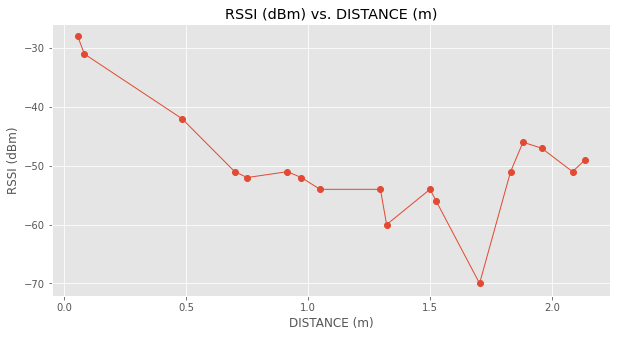

In [9]:
"""Shows a plot depicting mode RSSI vs. Distance data."""
data.sort_values(by=['DISTANCE', 'RSSI'], inplace=True)
data = data.drop(['TEMPERATURE', 'HUMIDITY', 'PRESSURE'], 1)
modes: pd.DataFrame = pd.DataFrame(columns=['RSSI', 'DISTANCE'])

# Take the mode RSSI value from each pre-measured distance
for distance in data['DISTANCE'].unique():
    datapart = data[data.DISTANCE == distance]
    datapart = datapart.agg(func='mode')
    modes = modes.append([datapart])

# Plot mode RSSI vs. Distance
# style.use("ggplot")
fig, axs = plt.subplots(figsize=[10, 5])
axs.plot(modes['DISTANCE'], modes['RSSI'], linewidth=1, marker='o', label='mode')
axs.set_xlabel(f'DISTANCE (m)')
axs.set_ylabel(f'RSSI (dBm)')
axs.set_title(f'RSSI (dBm) vs. DISTANCE (m)')

plt.show()

# Mode RSSI vs. Humidity

The code below (taken directly from pi_pact_plot_env.py) plots the Mode RSSI vs. Humidity relationship. There is an overall upward trend.

In [10]:
INDEPEND: str = 'HUMIDITY'
INDEPEND_UNITS: str = '%'
DEPEND: str = 'RSSI'
DEPEND_UNITS: str = 'dBm'

In [11]:
# Initialize DataFrame
data: pd.DataFrame = pd.DataFrame(columns=[DEPEND, INDEPEND])
csv_file: Path
for csv_file in Path('.').glob('indoor-noObstruct-SenseHat*/*.csv'):
    datapart: pd.DataFrame = pd.read_csv(csv_file)
    for column in DROP_COLUMNS:
        if column in datapart.columns:
            datapart = datapart.drop([column], 1)
    data = data.append(datapart)
data.sort_values(by=[INDEPEND, DEPEND], inplace=True)
data[INDEPEND] = data[INDEPEND].round(0)

In [12]:
# Take the mode RSSI value from each unique independent varaible value
data = data.drop(['DISTANCE', 'TEMPERATURE', 'PRESSURE'], 1)
modes: pd.DataFrame = pd.DataFrame(columns=[DEPEND, INDEPEND])
for value in data[INDEPEND].unique():
    datapart: pd.DataFrame = data.query(f'{INDEPEND} == {value}')
    datapart = datapart.agg(func='mode')
    modes = modes.append([datapart])

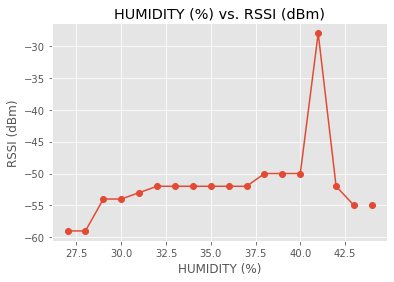

In [13]:
# Plot a line plot depicting the relationship between RSSI and some other variable
style.use("ggplot")
fig, axs = plt.subplots()
axs.plot(modes[INDEPEND], modes[DEPEND], marker='o')
axs.set_xlabel(f'{INDEPEND} ({INDEPEND_UNITS})')
axs.set_ylabel(f'{DEPEND} ({DEPEND_UNITS})')
axs.set_title(f'{INDEPEND} ({INDEPEND_UNITS}) vs. {DEPEND} ({DEPEND_UNITS})')

plt.show()

# Mode RSSI vs. Temperature

The code below (taken directly from pi_pact_plot_env.py) plots the Mode RSSI vs. Temperature relationship. There is an overall downward trend.

In [14]:
INDEPEND: str = 'TEMPERATURE'
INDEPEND_UNITS: str = 'Degrees C'

In [15]:
# Initialize DataFrame
data: pd.DataFrame = pd.DataFrame(columns=[DEPEND, INDEPEND])
csv_file: Path
for csv_file in Path('.').glob('indoor-noObstruct-SenseHat*/*.csv'):
    datapart: pd.DataFrame = pd.read_csv(csv_file)
    for column in DROP_COLUMNS:
        if column in datapart.columns:
            datapart = datapart.drop([column], 1)
    data = data.append(datapart)
data.sort_values(by=[INDEPEND, DEPEND], inplace=True)
data[INDEPEND] = data[INDEPEND].round(0)

In [16]:
# Take the mode RSSI value from each unique independent varaible value
data = data.drop(['HUMIDITY', 'DISTANCE', 'PRESSURE'], 1)
modes: pd.DataFrame = pd.DataFrame(columns=[DEPEND, INDEPEND])
for value in data[INDEPEND].unique():
    datapart: pd.DataFrame = data.query(f'{INDEPEND} == {value}')
    datapart = datapart.agg(func='mode')
    modes = modes.append([datapart])

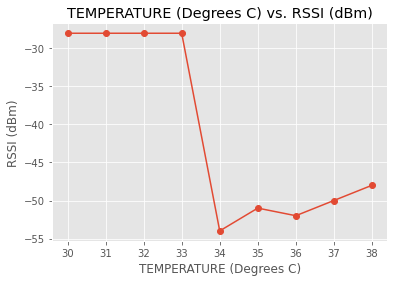

In [17]:
# Plot a line plot depicting the relationship between RSSI and some other variable
style.use("ggplot")
fig, axs = plt.subplots()
axs.plot(modes[INDEPEND], modes[DEPEND], marker='o')
axs.set_xlabel(f'{INDEPEND} ({INDEPEND_UNITS})')
axs.set_ylabel(f'{DEPEND} ({DEPEND_UNITS})')
axs.set_title(f'{INDEPEND} ({INDEPEND_UNITS}) vs. {DEPEND} ({DEPEND_UNITS})')

plt.show()

# Mode RSSI vs. Pressure

The code below (taken directly from pi_pact_plot_env.py) plots the Mode RSSI vs. Pressure relationship. There is an overall downward trend.

In [18]:
INDEPEND: str = 'PRESSURE'
INDEPEND_UNITS: str = 'mbar'

In [19]:
# Initialize DataFrame
data: pd.DataFrame = pd.DataFrame(columns=[DEPEND, INDEPEND])
csv_file: Path
for csv_file in Path('.').glob('indoor-noObstruct-SenseHat*/*.csv'):
    datapart: pd.DataFrame = pd.read_csv(csv_file)
    for column in DROP_COLUMNS:
        if column in datapart.columns:
            datapart = datapart.drop([column], 1)
    data = data.append(datapart)
data.sort_values(by=[INDEPEND, DEPEND], inplace=True)
data[INDEPEND] = data[INDEPEND].round(0)

In [20]:
# Take the mode RSSI value from each unique independent varaible value
data = data.drop(['TEMPERATURE', 'HUMIDITY', 'DISTANCE'], 1)
modes: pd.DataFrame = pd.DataFrame(columns=[DEPEND, INDEPEND])
for value in data[INDEPEND].unique():
    datapart: pd.DataFrame = data.query(f'{INDEPEND} == {value}')
    datapart = datapart.agg(func='mode')
    modes = modes.append([datapart])

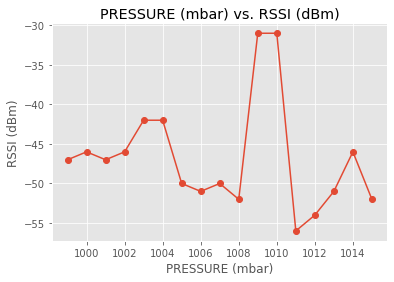

In [21]:
# Plot a line plot depicting the relationship between RSSI and some other variable
style.use("ggplot")
fig, axs = plt.subplots()
axs.plot(modes[INDEPEND], modes[DEPEND], marker='o')
axs.set_xlabel(f'{INDEPEND} ({INDEPEND_UNITS})')
axs.set_ylabel(f'{DEPEND} ({DEPEND_UNITS})')
axs.set_title(f'{INDEPEND} ({INDEPEND_UNITS}) vs. {DEPEND} ({DEPEND_UNITS})')

plt.show()